In [71]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

california_housing = fetch_california_housing(as_frame=True)

In [2]:
print()
print()
print("frame")
print(california_housing.data.head())
print()
print("target")
print(california_housing.target.head())
print()
print("frame")
print(california_housing.frame.head())
print()
print(type(california_housing.data.head()))
print(type(california_housing.target.head()))
print(type(california_housing.frame.head()))



frame
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

target
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

frame
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt 


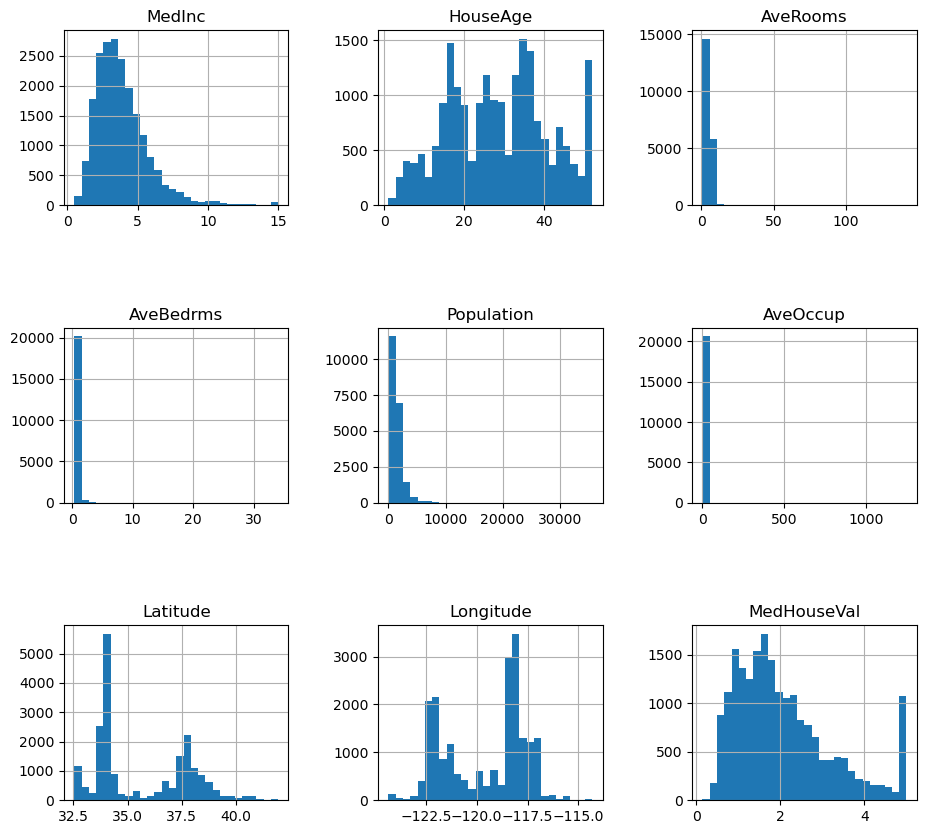

In [4]:
california_housing.frame.hist(figsize = (11,10),bins = 28 )
plt.subplots_adjust(hspace = 0.7 , wspace = 0.4)

In [5]:
import numpy as np

# Function to calculate the number of bins using Freedman-Diaconis Rule
def freedman_diaconis_bin_size(data):
    n = len(data)
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / n ** (1/3)
    bins = np.ceil((data.max() - data.min()) / bin_width)
    return int(bins)

# Generate sample data
np.random.seed(0)
sample_data = np.random.rand(20640) * 100  # generating sample data with 20640 points

# Calculate the number of bins using Freedman-Diaconis Rule
fd_bins = freedman_diaconis_bin_size(sample_data)
print("Freedman-Diaconis number of bins:", fd_bins)


Freedman-Diaconis number of bins: 28


In [6]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
features  = ["AveRooms","AveBedrms","AveOccup","Population"]

In [8]:
california_housing.frame[features].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


In [9]:
import seaborn as sns
sns.set_theme(style = "white")


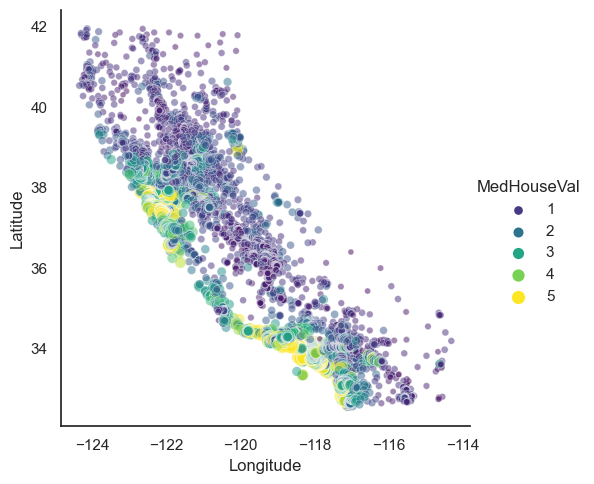

In [11]:
sns.relplot(x="Longitude",y='Latitude',hue = "MedHouseVal",alpha = 0.5, edgecolor = 'w',palette='viridis',data = california_housing.frame,size = "MedHouseVal")

In [23]:
#random sampling 
import numpy  as np
randomgenerator  = np.random.RandomState(0)
m = np.arange(california_housing.frame.shape[0])
print(m)
INDICES = randomgenerator.choice(m,size = 500, replace= False)
print(type(INDICES))
print(INDICES)

[    0     1     2 ... 20637 20638 20639]
<class 'numpy.ndarray'>
[14740 10101 20566  2670 15709   439   845  3768   964  8681 17935  9228
 13579    74  6349 16980 11495 15631   477 15812 14770  2055 17722 18465
 11693  4139  8463 20224 16196  9219  5418  6981  5411 15489  2400    18
 19002 12158  6773 19363  7286  9233  2140 18236 10950 13895  9708  9470
  7005   998  8690  2291 16728 18793  4585 13135 10574 19269 11138 17449
 12177 19101 14142  5048 16283 14265 16245 11416  5960 11873 10472 13354
  7841  2462 17237 20629 16903 14292  7115 16551 15954  1872  9628 16638
 11613 11241 18988  6133  2169  5094 10133 18940  9244 11036  2582  1640
 17326  4191 20078  1540 14734 18471  8919 10535 18936  7908 15343  2122
 12601  4643  8013  2910 15378  5366 15580 10428 14915 13804 14699 13709
  3629  3198 15381 16959  4462 15998 15334  9348  6752  8041  2438 16633
  4429   775 12794  4592  8594 17440 19703 13888  6344 20195 11126 14842
 13681 18996  1438  5288 11854 14034 15700 12390  9196  20

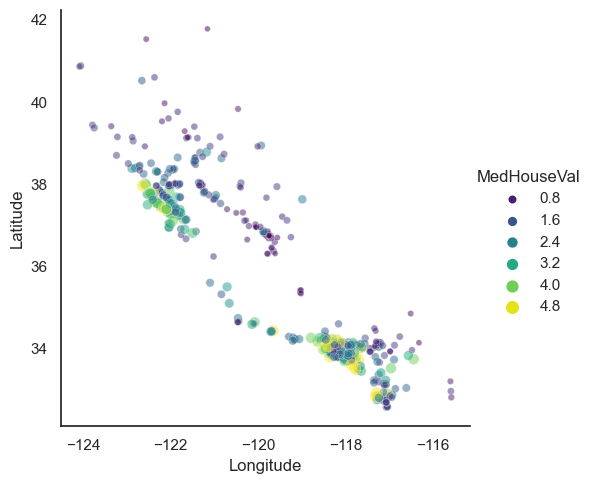

In [25]:
sns.relplot(x="Longitude",y='Latitude',hue = "MedHouseVal",alpha = 0.5, edgecolor = 'w',palette='viridis',data = california_housing.frame.iloc[INDICES],size = "MedHouseVal")

In [26]:
import pandas as pd 


In [29]:
columntobedropped = ["Longitude","Latitude"]
columnsforanalysisis = california_housing.frame.iloc[INDICES].drop(columns=columntobedropped)
print(columnsforanalysisis)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
14740  4.1518      22.0  5.663073   1.075472      1551.0  4.180593   
10101  5.7796      32.0  6.107226   0.927739      1296.0  3.020979   
20566  4.3487      29.0  5.930712   1.026217      1554.0  2.910112   
2670   2.4511      37.0  4.992958   1.316901       390.0  2.746479   
15709  5.0049      25.0  4.319261   1.039578       649.0  1.712401   
...       ...       ...       ...        ...         ...       ...   
11807  3.0321      21.0  4.731083   1.013970      1847.0  2.150175   
2594   2.5667      12.0  4.764840   0.968037      1603.0  3.659817   
9609   1.7600      29.0  3.664336   1.062937      1697.0  3.955711   
13527  1.8750      30.0  5.668950   1.308219      1172.0  2.675799   
3263   2.2188      20.0  5.739796   1.178571       521.0  2.658163   

       MedHouseVal  
14740        1.369  
10101        2.413  
20566        2.007  
2670         0.725  
15709        4.600  
...            ...  
11807       

In [40]:
print(columnsforanalysisis["MedHouseVal"])

14740    (0.956, 1.403]
10101    (2.269, 3.327]
20566    (1.806, 2.269]
2670     (0.437, 0.956]
15709      (3.327, 5.0]
              ...      
11807    (0.956, 1.403]
2594     (0.956, 1.403]
9609     (0.437, 0.956]
13527    (0.437, 0.956]
3263     (0.956, 1.403]
Name: MedHouseVal, Length: 500, dtype: category
Categories (6, interval[float64, right]): [(0.437, 0.956] < (0.956, 1.403] < (1.403, 1.806] < (1.806, 2.269] < (2.269, 3.327] < (3.327, 5.0]]


In [44]:
na =columnsforanalysisis["MedHouseVal"].isna().sum()
print(na)

0


In [45]:
print(columnsforanalysisis["MedHouseVal"].dtype)


category


In [60]:
non_numeric_values = columnsforanalysisis["MedHouseVal"].loc[~columnsforanalysisis["MedHouseVal"].apply(np.isreal)]
print(non_numeric_values)


Series([], Name: MedHouseVal, dtype: category
Categories (6, float64): [0.6965 < 1.1795 < 1.6045 < 2.0375 < 2.7980 < 4.1635])


C:\Users\adige\AppData\Local\Temp\ipykernel_19340\2006532253.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(non_numeric_values)


In [61]:
# already in 6 bins  columnsforanalysisis["MedHouseVal"] = pd.qcut(columnsforanalysisis["MedHouseVal"],6,retbins = False)
columnsforanalysisis["MedHouseVal"] = columnsforanalysisis["MedHouseVal"].apply(lambda x: x.mid)# ONLY  ONCE                                                                


AttributeError: 'float' object has no attribute 'mid'

In [63]:
print(columnsforanalysisis["MedHouseVal"])

14740    1.1795
10101    2.7980
20566    2.0375
2670     0.6965
15709    4.1635
          ...  
11807    1.1795
2594     1.1795
9609     0.6965
13527    0.6965
3263     1.1795
Name: MedHouseVal, Length: 500, dtype: category
Categories (6, float64): [0.6965 < 1.1795 < 1.6045 < 2.0375 < 2.7980 < 4.1635]


C:\Users\adige\AppData\Local\Temp\ipykernel_19340\1822405345.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(columnsforanalysisis["MedHouseVal"])


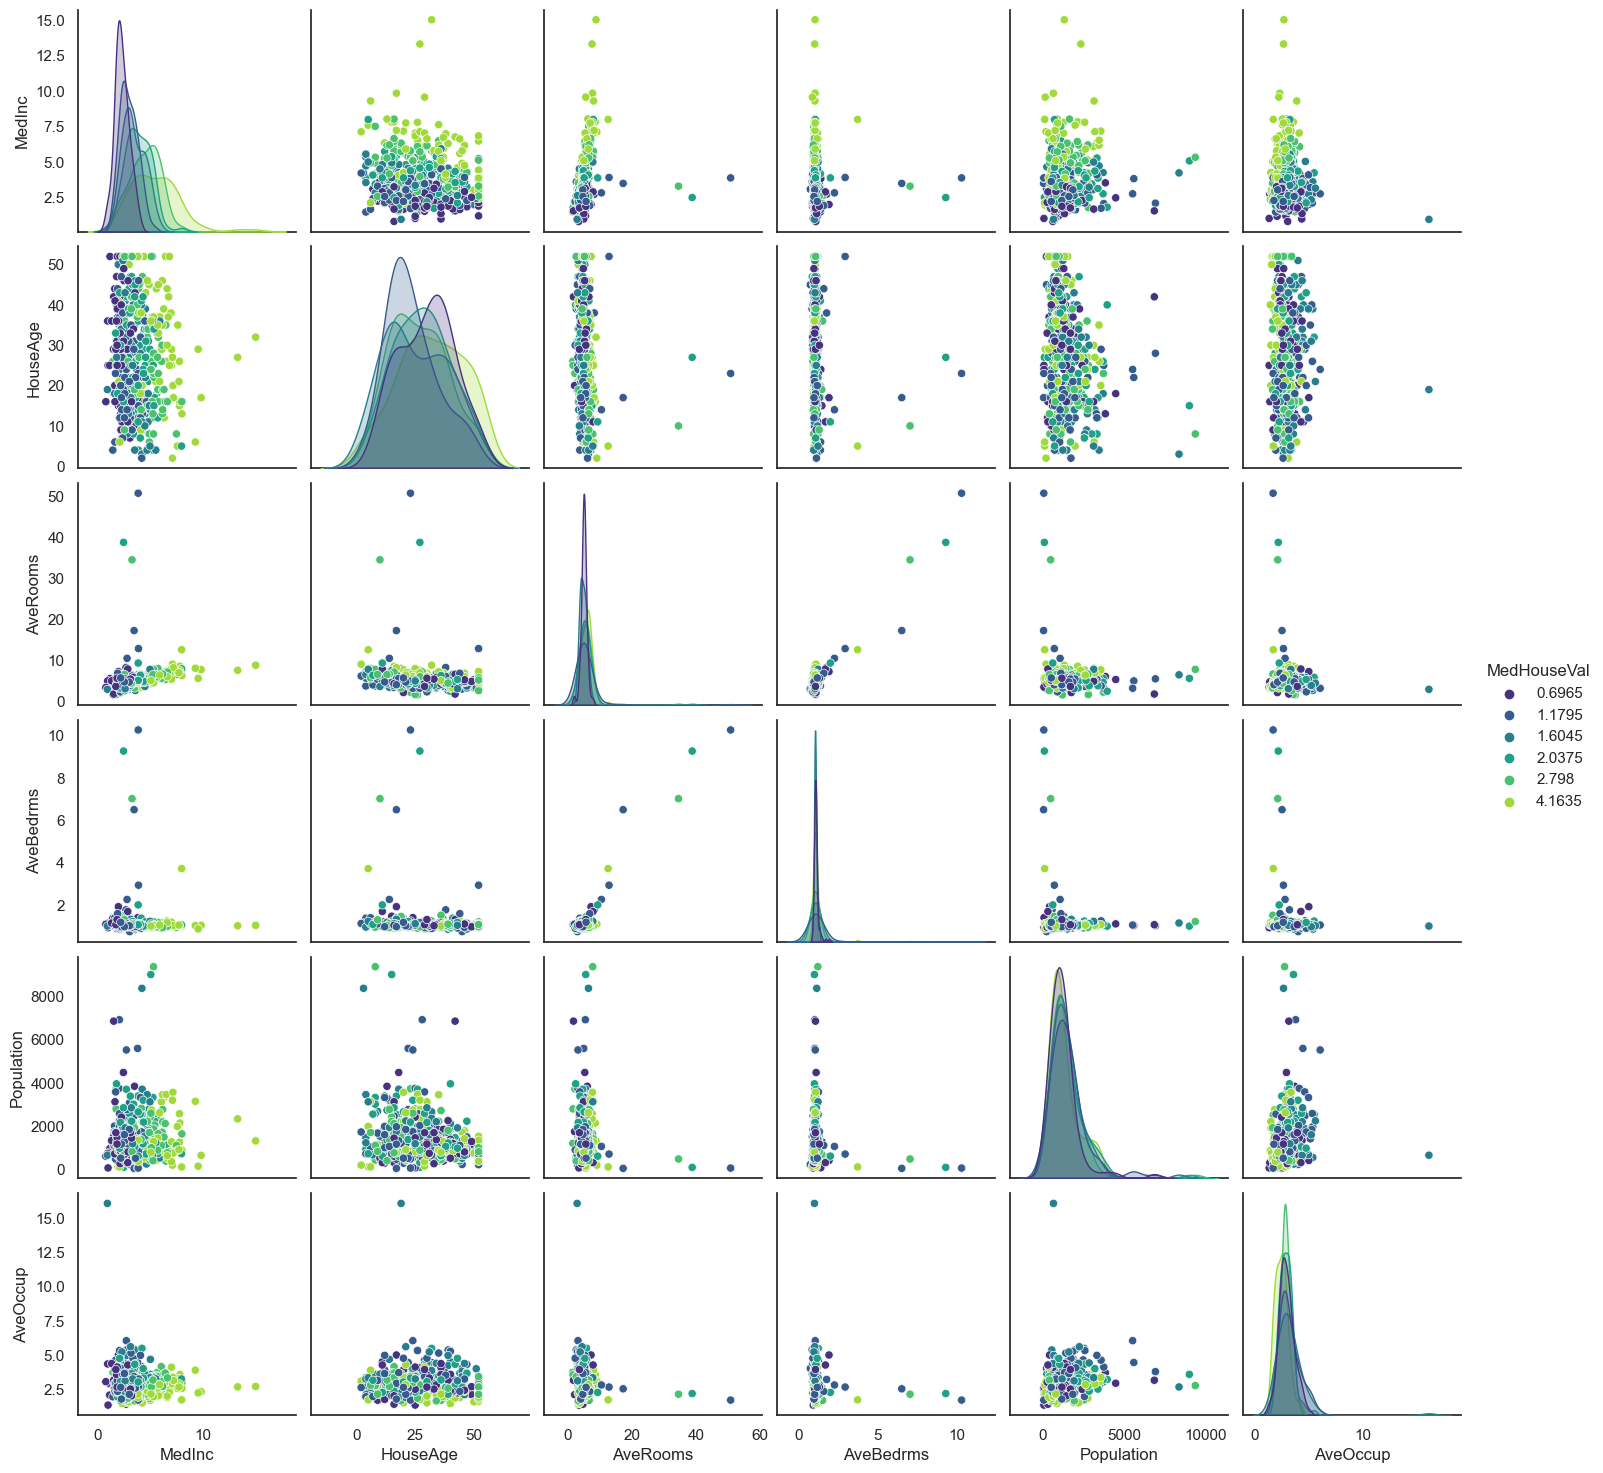

In [62]:
 p = sns.pairplot(data=columnsforanalysisis, hue="MedHouseVal", palette="viridis")

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

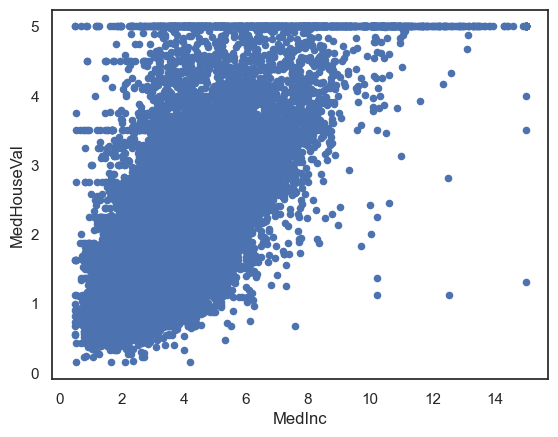

In [67]:
california_housing.frame.plot(kind="scatter", x="MedInc",y="MedHouseVal")

In [72]:
X = california_housing.frame.iloc[:,:-1]
y = california_housing.frame.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [74]:
y_pred = regression_pipeline.predict(X_test)
r2_score( y_test, y_pred)

0.5757877060324511